# Data transform

## Load

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
import constants as c

sns.set()

In [2]:
data = pd.read_csv('data/raw_tracks.csv')
data.shape

(1204025, 24)

## Transform

### Songs

In [3]:
# Process lists that appear as strings 
data['artists'] = data['artists'].map(literal_eval)
data['artist_ids'] = data['artist_ids'].map(literal_eval)
data['num_artists'] = data['artists'].apply(len)

In [4]:
# Filter songs
min_songs = data['num_artists'][data['num_artists'] <= 10].value_counts().min()
tdata = data[data['num_artists'] <= 10].groupby('num_artists').sample(min_songs)
tdata['release_date'] = tdata['release_date'].astype('datetime64[ns]')
tdata = tdata.reset_index(drop=True)

# Combine IDs with names
tdata['artists'] = tdata[['artists', 'artist_ids']].apply(lambda x: list(zip(x['artists'], x['artist_ids'])), axis=1)
tdata['album'] = tdata[['album', 'album_id']].apply(lambda x: (x['album'], x['album_id']), axis=1)
tdata['song'] = tdata[['name', 'id']].apply(lambda x: (x['name'], x['id']), axis=1)
tdata = tdata.drop(columns=['artist_ids', 'name', 'id', 'album_id'])
tdata = tdata[
    ['artists', 'num_artists', 'album', 'song', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
     'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
     'duration_ms', 'time_signature', 'year', 'release_date']]

In [5]:
songs_clean = tdata.copy()
songs_clean = songs_clean.set_index('song')[
    ['disc_number', 'track_number', 'duration_ms', 'year', 'explicit', 'danceability', 'energy', 'key', 'loudness',
     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
songs_clean

,disc_number,track_number,duration_ms,year,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song,,,,,,,,,,,,,,,,
"(Jungles, 4eoaUEw0nV2TMu3SlRAmBV)",1,3,311781,2018,False,0.217,0.6740,0,-5.202,0,0.0580,0.00207,0.084000,0.1110,0.0565,107.170
"(The Blues Overtook Me, 6JewT4bph3ljtxu1srOaCl)",1,1,282707,1990,False,0.409,0.8250,7,-5.756,1,0.1060,0.13600,0.004140,0.2050,0.7420,146.516
"(Chansons d'amour, 1wsaQy1Bnr1xrofZJmKLgk)",1,9,229280,2014,False,0.610,0.7240,9,-4.425,1,0.0287,0.33500,0.000000,0.0932,0.7380,103.998
"(Throwing Stones, 1rBt7aHt2FWAZlQPTB4PgJ)",1,3,225652,2011,False,0.388,0.7720,7,-5.346,1,0.0804,0.06410,0.001090,0.0509,0.6890,195.974
"(Little Whitewash Cabin, 726kGgcd9gfTOPENdyGYpC)",1,16,241960,1996,False,0.655,0.3960,3,-9.093,1,0.0361,0.36100,0.000000,0.1240,0.6860,75.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Therese Raquin: Act I Scene 2: We'll recall when years have passed (Madame), 4TY1KaF8vALpdPzUq48VBm)",1,14,245800,2002,False,0.243,0.2610,11,-20.394,0,0.0536,0.84900,0.002900,0.1380,0.2390,83.729
"(Siegfried, WWV 86C Act I Scene 3: Fühltest du nie im finstren Wald (Live), 4MZ8gSYKAf9HknLDe2Vy35)",2,1,302120,2010,False,0.186,0.1640,5,-20.505,1,0.0408,0.98000,0.020500,0.1840,0.1130,71.472
"(Lucia di Lammermoor: Chi mi frena in tal momento?, 2QGeCpxrWGnaOpzT4kqsBP)",1,6,215600,2008,False,0.270,0.4750,1,-13.094,1,0.0738,0.97300,0.000014,0.6810,0.3450,82.986


### Pairs

In [6]:
pairs = tdata.explode('artists')
pairs = pairs.rename(columns={'artists': 'artist'})
pairs = pairs.reset_index(drop=True)
pairs = pairs.drop(columns=['num_artists'])

### Artists

In [7]:
artists = pairs.groupby('artist').agg({'album': [lambda x: x.tolist(), 'count'],
                                       'song': [lambda x: x.tolist(), 'count'],
                                       'year': ['min', 'max'],
                                       'release_date': ['min', 'max'],
                                       'duration_ms': ['min', 'max', 'mean']})
temp = pairs.groupby('artist')[
    'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'].mean()
artists = pd.concat([artists, temp], axis=1)
artists['years_span'] = artists[('year', 'max')] - artists[('year', 'min')]
artists['days_span'] = (artists[('release_date', 'max')] - artists[('release_date', 'min')]).dt.days

C:\Users\matan_39ey9fy\AppData\Local\Temp\ipykernel_16436\651269558.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = pairs.groupby('artist')[


In [8]:
artists_clean = artists[
    [('year', 'min'), ('year', 'max'), 'years_span', 'days_span', ('album', 'count'), ('song', 'count'),
     ('duration_ms', 'min'), ('duration_ms', 'max'), ('duration_ms', 'mean'), 'explicit', 'danceability', 'energy',
     'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
avg_song_per_album = pairs.groupby(['artist', 'album']).size().reset_index(name='counts').groupby('artist')[
    'counts'].mean()
artists_clean.insert(6, 'avg_songs_per_album', avg_song_per_album)
artists_clean = artists_clean.rename(
    columns={('year', 'min'): 'first_year', ('year', 'max'): 'last_year', ('album', 'count'): 'num_albums',
             ('song', 'count'): 'num_songs', ('duration_ms', 'min'): 'min_duration_ms',
             ('duration_ms', 'max'): 'max_duration_ms', ('duration_ms', 'mean'): 'avg_duration_ms'})
artists_clean = artists_clean.rename(columns={col: f"avg_{col}" for col in artists_clean.columns[10:]})
artists_clean

C:\Users\matan_39ey9fy\anaconda3\lib\site-packages\pandas\core\common.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,first_year,last_year,years_span,days_span,num_albums,num_songs,avg_songs_per_album,min_duration_ms,max_duration_ms,avg_duration_ms,...,avg_energy,avg_key,avg_loudness,avg_mode,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo
artist,,,,,,,,,,,,,,,,,,,,,
"(""Papa"" John Defrancesco, 0MsdOFWTQ7r5vs8bOczy1U)",2001,2001,0,0,1,1,1.0,393773,393773,393773.0,...,0.56300,5.0,-9.5500,0.0,0.03150,0.643000,0.877000,0.15600,0.7110,130.0990
"((Hed) P.E., 0xIChbcTsuYLueN1oEsX9v)",1997,2003,6,1966,2,2,1.0,213345,245867,229606.0,...,0.88500,8.0,-6.1205,0.5,0.08025,0.000285,0.001315,0.18200,0.2850,97.2540
"(*NSYNC, 6Ff53KvcvAj5U7Z1vojB5o)",1998,1998,0,0,1,1,1.0,233093,233093,233093.0,...,0.52000,4.0,-7.9400,1.0,0.02490,0.237000,0.000000,0.25700,0.1890,80.8780
"(100 gecs, 6PfSUFtkMVoDkx4MQkzOi3)",2020,2020,0,0,1,1,1.0,128714,128714,128714.0,...,0.50500,0.0,-7.0870,1.0,0.15100,0.115000,0.000000,0.36300,0.4810,139.9530
"(1006 Fac, 5xdrLTyFECnyARgvGnNj2T)",2002,2002,0,0,1,1,1.0,306667,306667,306667.0,...,0.71100,11.0,-5.4360,1.0,0.23800,0.450000,0.000000,0.36300,0.9250,84.5560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(舒米, 0BPF3NcRxD9W8JjXiCeZdG)",2015,2015,0,0,1,1,1.0,71388,71388,71388.0,...,0.16200,2.0,-19.3040,0.0,0.03130,0.875000,0.002360,0.09940,0.0837,71.0190
"(舟沢虫雄 (Mushio FUNAZAWA), 6vbY5YFW9BRPiFcAvyql8j)",1995,1995,0,0,1,1,1.0,202440,202440,202440.0,...,0.00428,2.0,-39.6040,0.0,0.04250,0.993000,0.882000,0.10300,0.0353,145.1540
"(葉歡, 4FqyapYq1CWwiP61S8zvVy)",1988,1994,6,2187,2,2,1.0,262631,321627,292129.0,...,0.31400,4.5,-12.7810,0.5,0.03225,0.708000,0.000209,0.10985,0.1895,111.6975


## Explore and save

(13280, 22)


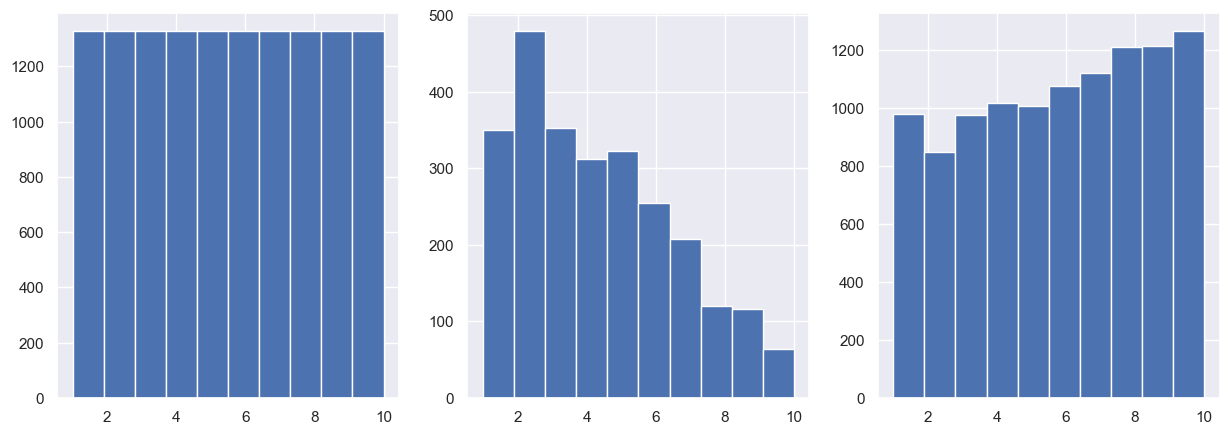

In [11]:
print(tdata.shape)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
tdata['num_artists'].hist(ax=axes[0])
tdata[tdata['year'] >= 2015]['num_artists'].hist(ax=axes[1])
tdata[tdata['year'] < 2015]['num_artists'].hist(ax=axes[2])
plt.show()

In [19]:
# Save tdata
import pickle as pkl
pkl.dump(songs_clean, open('data/songs.pkl', 'wb'))
pkl.dump(artists_clean, open('data/artists.pkl', 'wb'))
pkl.dump(pairs[['artist', 'song']], open('data/creations.pkl', 'wb'))